In [ ]:
# Data processing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.over_sampling import RandomOverSampler # for resampling unbalanced categories
from sklearn.preprocessing import LabelEncoder # Encodes string or categorical data to numerical values
from sklearn.model_selection import train_test_split # splits data into different sets
from sklearn.preprocessing import StandardScaler # scales data to be centered at the mean with min/max 1/-1
# Model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgbm
from sklearn.svm import SVC
# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Visualizations and plots
import matplotlib.pyplot as plt # generic plotting
import seaborn as sns # styled plotting

# Utility libraries
from pathlib import Path # directory path


In [ ]:
%%html
<!-- HTML style -->
<style>
table {float:left}
</style>

In [ ]:
np.random.seed(42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lung_cancer_df = pd.read_csv("/content/drive/MyDrive/ML/survey lung cancer.csv")
lung_cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# Let's check the shape of the data set
lung_cancer_df.shape

(309, 16)

In [ ]:
lung_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
lung_cancer_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
lung_cancer_df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
lung_cancer_df.duplicated().sum()

33

In [ ]:
lung_cancer_df.drop_duplicates(inplace=True)

In [ ]:
lung_cancer_df.shape

(276, 16)

In [ ]:
for categorical_column in lung_cancer_df:
    if categorical_column == 'AGE':
        continue
    lung_cancer_df[categorical_column]=LabelEncoder().fit_transform(lung_cancer_df[categorical_column])

lung_cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


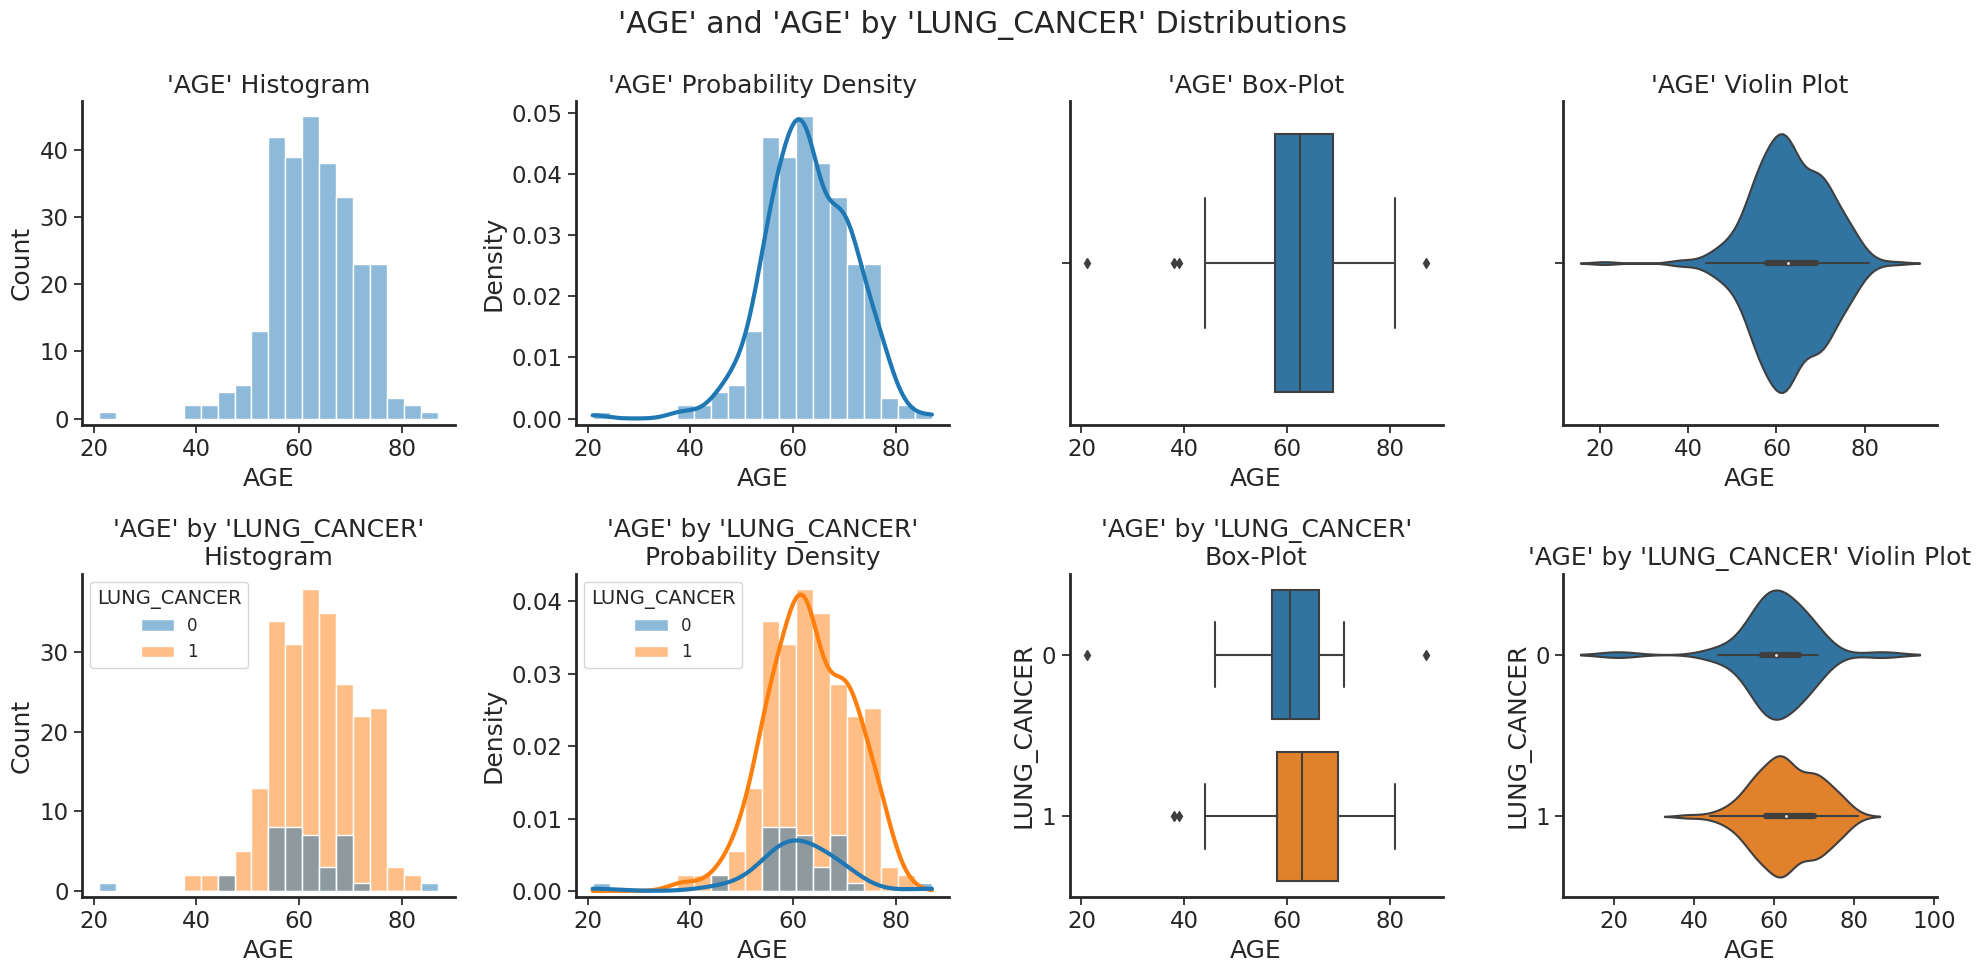

In [ ]:
# Temporarily handle style parameters for the plots so it returns to default after
with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    # Set up the canvas for the figure
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    # Plotting just 'AGE'
    sns.histplot(data=lung_cancer_df, x='AGE', ax=axs[0, 0], alpha=0.5, stat='count')
    axs[0, 0].set_title("'AGE' Histogram")

    sns.histplot(data=lung_cancer_df, x='AGE', kde=True, line_kws={'linewidth':3}, ax=axs[0, 1], stat='density')
    axs[0, 1].set_title("'AGE' Probability Density")

    sns.boxplot(data=lung_cancer_df, x='AGE', ax=axs[0, 2])
    axs[0, 2].set_title("'AGE' Box-Plot")

    sns.violinplot(data=lung_cancer_df, x='AGE', ax=axs[0, 3])
    axs[0, 3].set_title("'AGE' Violin Plot")

    # Plotting 'AGE' by 'LUNG_CANCER'
    sns.histplot(data=lung_cancer_df, x='AGE', hue='LUNG_CANCER', ax=axs[1, 0], stat='count')
    axs[1, 0].set_title("'AGE' by 'LUNG_CANCER'\nHistogram")

    sns.histplot(data=lung_cancer_df, x='AGE', hue='LUNG_CANCER', kde=True, line_kws={'linewidth':3}, ax=axs[1, 1], stat='density')
    axs[1, 1].set_title("'AGE' by 'LUNG_CANCER'\nProbability Density")

    sns.boxplot(data=lung_cancer_df, x='AGE', y='LUNG_CANCER', orient='h', ax=axs[1, 2])
    axs[1, 2].set_title("'AGE' by 'LUNG_CANCER'\nBox-Plot")

    sns.violinplot(data=lung_cancer_df, x='AGE', y='LUNG_CANCER', orient='h', ax=axs[1, 3])
    axs[1, 3].set_title("'AGE' by 'LUNG_CANCER' Violin Plot")
    for i, ax in enumerate(axs.flatten()):
        # Add a tiny space below the plot and the x-axis
        if i  in [0, 1, 4, 5]:
            y_bounds = ax.get_ybound()
            y_bottom = (y_bounds[0] + y_bounds[1]) / 50 * -1
            ax.set_ylim(y_bottom, ax.get_ybound()[1])
        # Remove or enhance plot spines (bounding box)
        for spine in ['top', 'right']:
            ax.spines[spine].set_linewidth(0)
        for spine in ['bottom', 'left']:
            ax.spines[spine].set_linewidth(2)
    plt.suptitle("'AGE' and 'AGE' by 'LUNG_CANCER' Distributions")
    plt.tight_layout()
    plt.show()

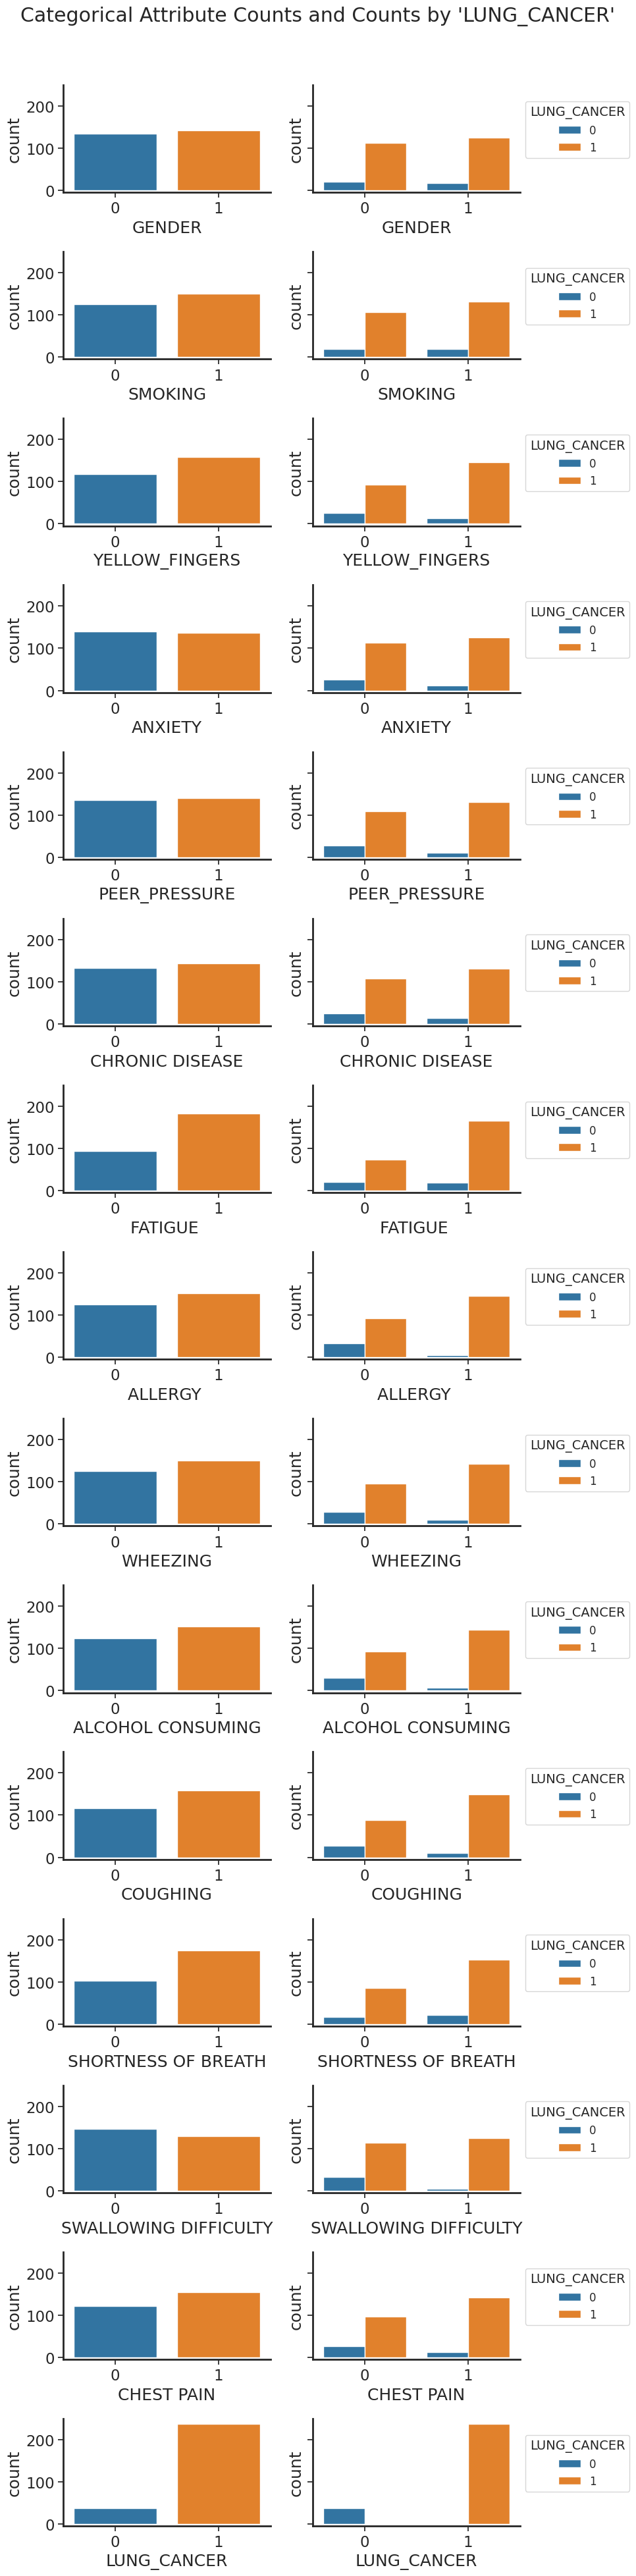

In [ ]:
# Temporarily handle style parameters for the plots so it returns to default after
with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    # Set up the canvas for the figure
    fig, axs = plt.subplots(15, 2, figsize=(10, 40), sharey=True)
    # Loop over attributes that are not 'AGE'
    cat_attributes = [col for col in lung_cancer_df.columns if col != 'AGE']
    for i, cat_attr in enumerate(cat_attributes):
        if cat_attr != 'AGE':                                                                 # 0-Female,1-Male & 0-NO,1-YES
            sns.countplot(data=lung_cancer_df, x=cat_attr, ax=axs[i, 0])
            sns.countplot(data=lung_cancer_df, x=cat_attr, hue='LUNG_CANCER', ax=axs[i, 1])
            sns.move_legend(axs[i, 1], bbox_to_anchor=(1,0.9),loc='upper left')
    for ax in axs.flatten():
        # Adjust the bottom of the plot to the x-axis with a tiny space
        y_bounds = ax.get_ybound()
        y_bottom = (y_bounds[0] + y_bounds[1]) / 50 * -1
        ax.set_ylim(y_bottom, ax.get_ybound()[1])
        for spine in ['top', 'right']:
            ax.spines[spine].set_linewidth(0)
        for spine in ['bottom', 'left']:
            ax.spines[spine].set_linewidth(2)
    plt.suptitle("Categorical Attribute Counts and Counts by 'LUNG_CANCER'")
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

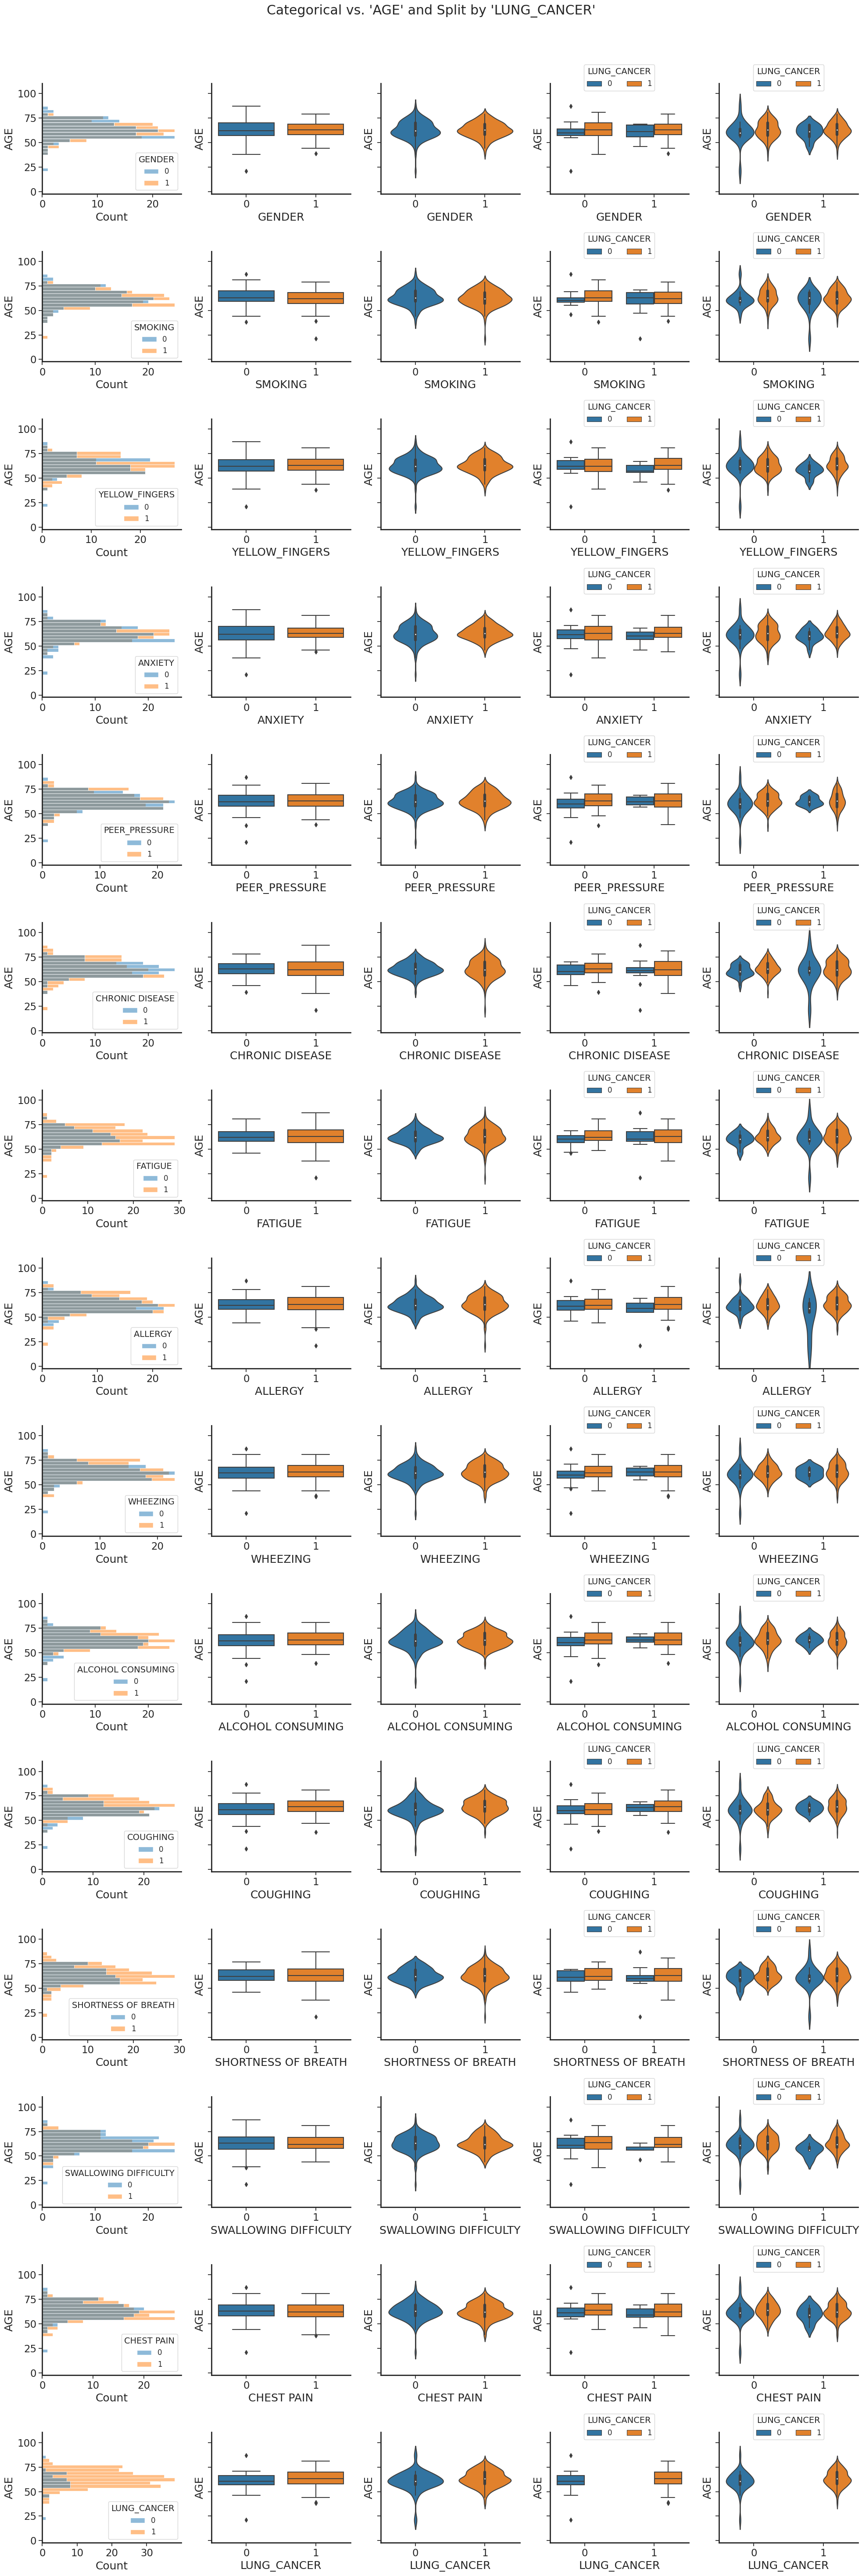

In [ ]:
# Temporarily handle style parameters for the plots so it returns to default after
with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    # Set up the canvas for the figure
    fig, axs = plt.subplots(15, 5, figsize=(20, 60), sharey=True)
    # Loop over attributes that are not 'AGE'
    cat_attributes = [col for col in lung_cancer_df.columns if col != 'AGE']
    for i, cat_attr in enumerate(cat_attributes):
        if cat_attr != 'AGE':
            sns.histplot(data=lung_cancer_df, y='AGE', hue=cat_attr, ax=axs[i, 0])
            sns.boxplot(data=lung_cancer_df, x=cat_attr, y='AGE', ax=axs[i, 1])
            sns.violinplot(data=lung_cancer_df, x=cat_attr, y='AGE', ax=axs[i, 2])
            sns.boxplot(data=lung_cancer_df, x=cat_attr, y='AGE', hue='LUNG_CANCER', ax=axs[i, 3])
            sns.move_legend(axs[i, 3], ncol=2, bbox_to_anchor=(0.5,0.9),loc='lower center')
            sns.violinplot(data=lung_cancer_df, x=cat_attr, y='AGE', hue='LUNG_CANCER', ax=axs[i, 4])
            sns.move_legend(axs[i, 4], ncol=2, bbox_to_anchor=(0.5,0.9),loc='lower center')
    for ax in axs.flatten():
        # Adjust the bottom of the plot to the x-axis with a tiny space
        y_bounds = ax.get_ybound()
        y_bottom = (y_bounds[0] + y_bounds[1]) / 50 * -1
        ax.set_ylim(y_bottom, ax.get_ybound()[1])
        # Remove or enhance plot spines (bounding box)
        for spine in ['top', 'right']:
            ax.spines[spine].set_linewidth(0)
        for spine in ['bottom', 'left']:
            ax.spines[spine].set_linewidth(2)
    plt.suptitle("Categorical vs. 'AGE' and Split by 'LUNG_CANCER'")
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

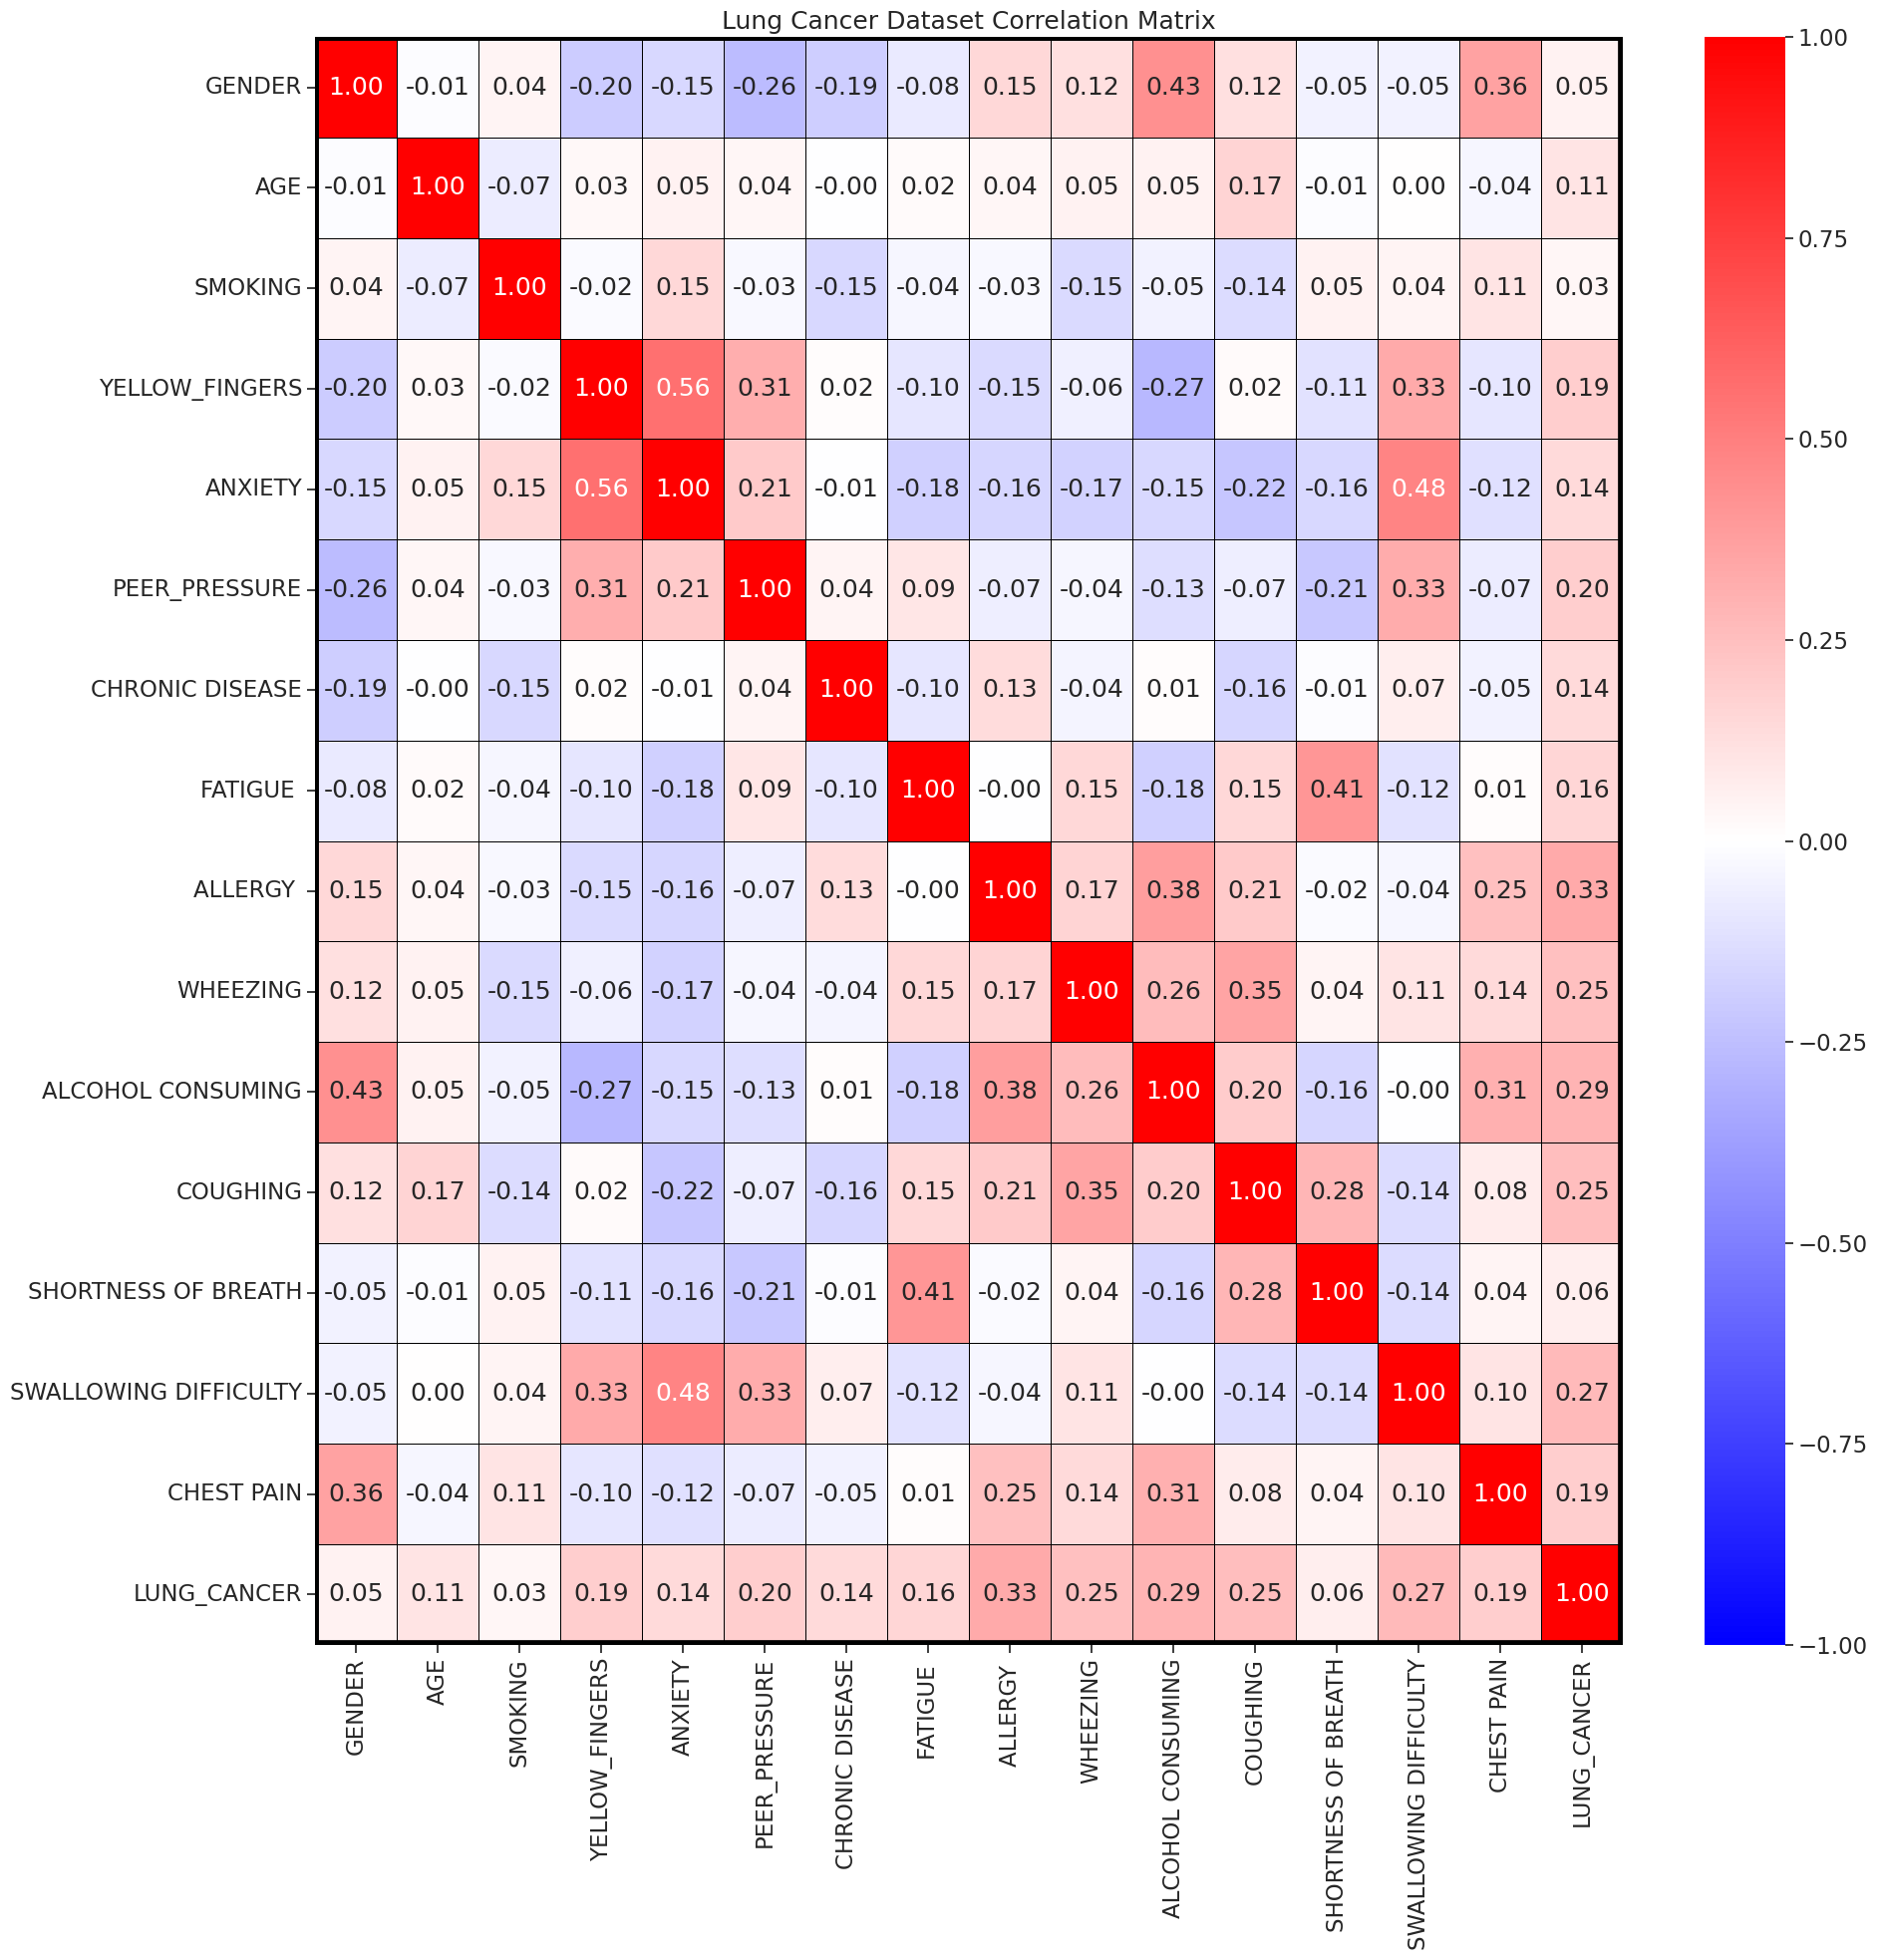

In [ ]:
# Here a diverging colormap was selected to make positive and negative correlation more easily discernible
with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    fig, axs = plt.subplots(figsize=(20,20))
    lung_cancer_df_corr = lung_cancer_df.corr()
    sns.heatmap(lung_cancer_df_corr, annot=True, linewidth=0.5, linecolor='k', fmt='0.2f', cmap='bwr', vmin=-1, vmax=1, ax=axs)
    plt.title("Lung Cancer Dataset Correlation Matrix")
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=lung_cancer_df_corr.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=lung_cancer_df_corr.shape[0], color='k',linewidth=7)
    plt.tight_layout()
    plt.show()

In [ ]:
# Separate independent and dependent attributes
X = lung_cancer_df.drop('LUNG_CANCER', axis=1)
y = lung_cancer_df['LUNG_CANCER']

In [ ]:
# Test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (207, 15)
Test shape: (69, 15)


In [ ]:
# resample minority class in both test and train
# We do this after the split so that duplicates don't pollute either set
X_train_resamp, y_train_resamp = RandomOverSampler().fit_resample(X_train, y_train)
X_test_resamp, y_test_resamp = RandomOverSampler().fit_resample(X_test, y_test)
print(f'Train_resampled shape : {X_train_resamp.shape}\nTest_resampled shape: {X_test_resamp.shape}')

Train_resampled shape : (358, 15)
Test_resampled shape: (118, 15)


In [ ]:
# standard scale 'AGE' in both test and train. Make sure to fit the train data and just transform the test data to avoid creating a new mean in the test data set.
scaler = StandardScaler()
X_train_resamp['AGE']=scaler.fit_transform(X_train_resamp[['AGE']])
X_test_resamp['AGE']=scaler.transform(X_test_resamp[['AGE']])
X_train_resamp.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0.254996,1,1,1,1,1,0,0,0,1,0,0,1,1
1,0,0.115197,0,0,0,0,1,1,0,0,0,0,1,0,0
2,0,-0.304199,0,0,0,0,1,1,0,0,0,0,1,0,0
3,1,-1.562389,0,1,0,0,1,1,1,1,1,1,1,0,1
4,1,-0.304199,1,1,1,1,1,0,1,0,1,0,0,1,1


In [ ]:
# Linear Regression
linreg = LinearRegression()

linreg.fit(X_train_resamp, y_train_resamp)

linreg_score = linreg.score(X_test_resamp, y_test_resamp)

print(f'Linear Regression Classifier Score: {linreg_score}')

Linear Regression Classifier Score: 0.7043790933550568


In [ ]:
# Logistic Regression
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400, 500, 1000],
            'max_iter':[50, 75, 100, 200, 300, 400, 500, 1000]}
logreg = RandomizedSearchCV(LogisticRegression(solver='lbfgs'), param_grid,cv=5)
logreg.fit(X_train_resamp, y_train_resamp)

print(logreg.best_params_)

{'max_iter': 300, 'C': 0.1}


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        59
           1       1.00      0.86      0.93        59

    accuracy                           0.93       118
   macro avg       0.94      0.93      0.93       118
weighted avg       0.94      0.93      0.93       118



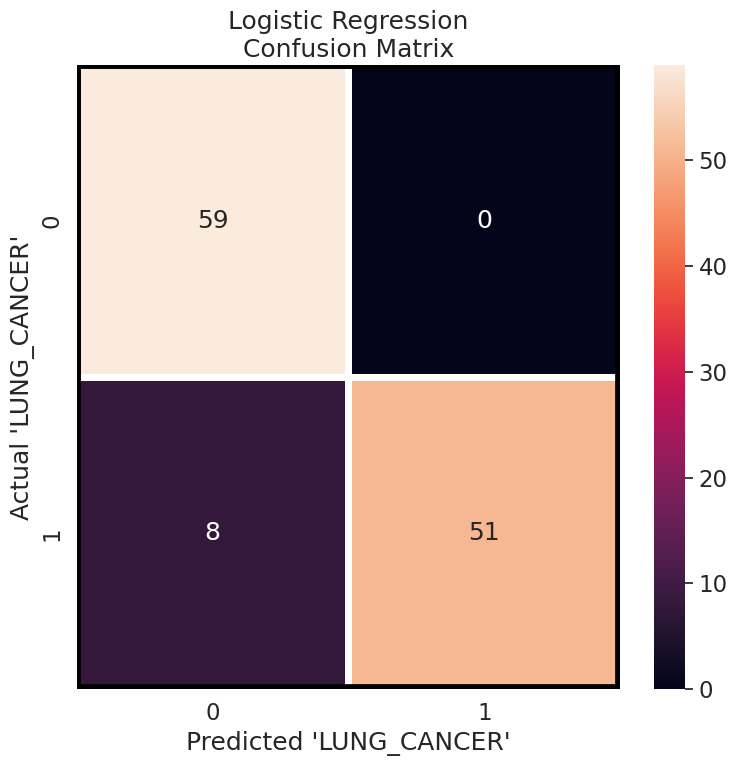

In [ ]:
# Logistic Regression Model Evaluation
y_pred_logreg = logreg.predict(X_test_resamp)

print(classification_report(y_test_resamp, y_pred_logreg))

confusion_logreg = confusion_matrix(y_test_resamp, y_pred_logreg)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("white"):
    fig, axs = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_logreg, annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
    axs.set_title('Logistic Regression\nConfusion Matrix')
    axs.set_xlabel("Predicted 'LUNG_CANCER'")
    axs.set_ylabel("Actual 'LUNG_CANCER'")
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=confusion_logreg.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=confusion_logreg.shape[0], color='k',linewidth=7)
    plt.tight_layout()
    plt.show()

In [ ]:
# We are only interested in how well we Recall the 'YES'(1) label for 'LUNG_CANCER'
logreg_recall_score = recall_score(y_test_resamp, y_pred_logreg, labels=1)
logreg_avg_recall_score = recall_score(y_test_resamp, y_pred_logreg, average="weighted")
print(f"Logistic Regression Classifier Recall ('YES'): {logreg_recall_score}")
print(f'Logistic Regression Classifier Average Recall: {logreg_avg_recall_score}')

Logistic Regression Classifier Recall ('YES'): 0.864406779661017
Logistic Regression Classifier Average Recall: 0.9322033898305084


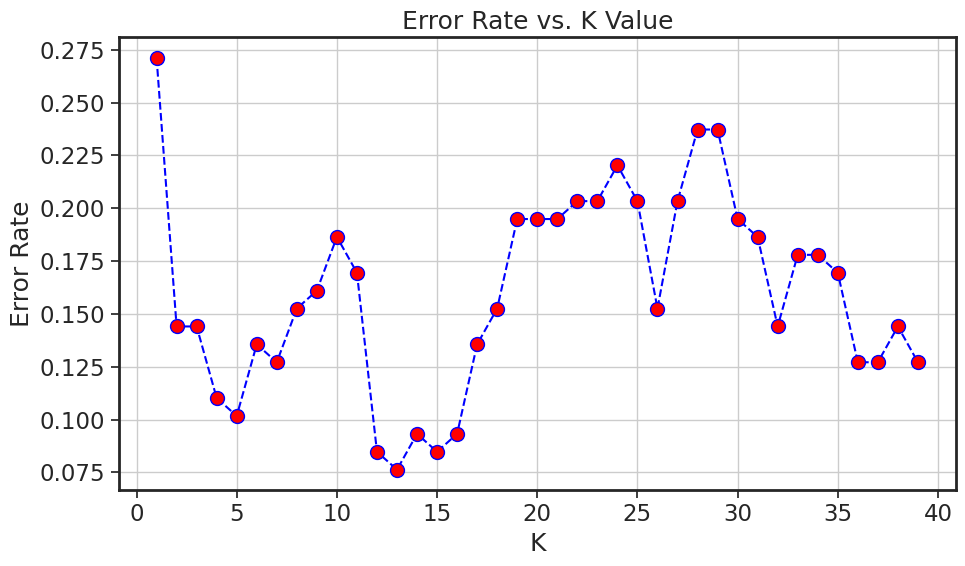

In [ ]:
# KNN

# First find neighbor count with min error rate
knn_error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_resamp, y_train_resamp)
 pred_i = knn.predict(X_test_resamp)
 knn_error_rate.append(np.mean(pred_i != y_test_resamp))

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    fig, axs = plt.subplots(figsize=(10,6))
    axs.plot(range(1,40), knn_error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    axs.set_title('Error Rate vs. K Value')
    axs.set_xlabel('K')
    axs.set_ylabel('Error Rate')
    # Style, oh yeah
    for spine in ['left', 'top', 'right', 'bottom']:
        axs.spines[spine].set_linewidth(2)
    plt.tight_layout()
    plt.grid()
    plt.show()

In [ ]:
min_knn_error_rate = min(knn_error_rate)
min_knn_error_rate_inds = [i for i, x in enumerate(knn_error_rate) if x == min_knn_error_rate]

for x in min_knn_error_rate_inds:
    print(f'Minimum error: {min_knn_error_rate} at K = {x+1}')

Minimum error: 0.07627118644067797 at K = 13


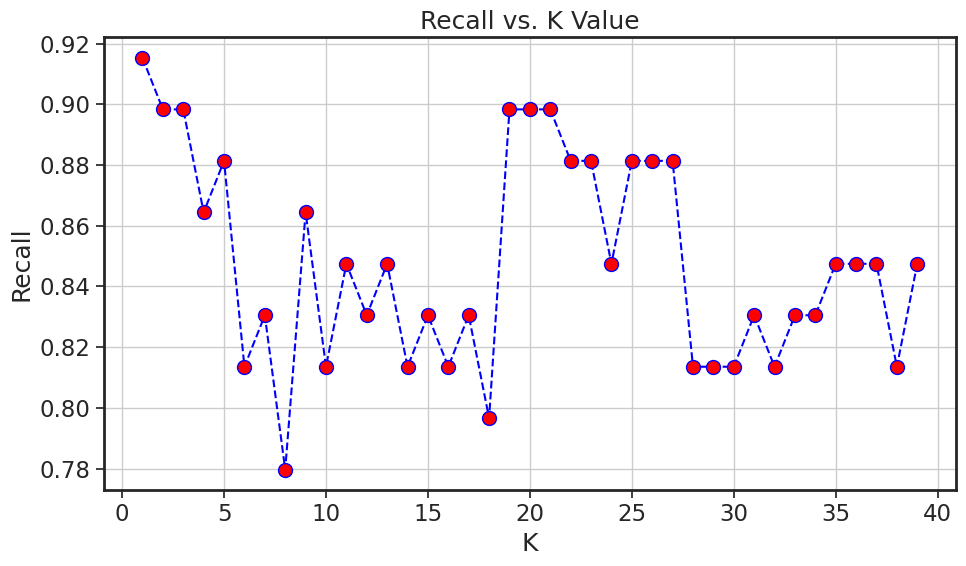

In [ ]:
# Now evaluate recall scores for different neighbor counts
knn_recall_scores = []

for i in range(1,40):
    knn_i_neighbors = KNeighborsClassifier(n_neighbors = i).fit(X_train_resamp, y_train_resamp)
    y_pred_i_neighbors = knn_i_neighbors.predict(X_test_resamp)
    knn_recall_scores.append(recall_score(y_test_resamp, y_pred_i_neighbors, labels=1))

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    fig, axs = plt.subplots(figsize=(10,6))
    axs.plot(range(1,40), knn_recall_scores, color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    axs.set_title('Recall vs. K Value')
    axs.set_xlabel('K')
    axs.set_ylabel('Recall')
    for spine in ['left', 'top', 'right', 'bottom']:
        axs.spines[spine].set_linewidth(2)
    plt.tight_layout()
    plt.grid()
    plt.show()

In [ ]:
max_knn_recall_score = max(knn_recall_scores)
max_knn_recall_score_inds = [i for i, x in enumerate(knn_recall_scores) if x == max_knn_recall_score]

for x in max_knn_recall_score_inds:
    print(f'Maximum recall: {max_knn_recall_score} at K = {x+1}')

Maximum recall: 0.9152542372881356 at K = 1


In [ ]:
# Let's also look at the recall scores where the error is minimized
for x in min_knn_error_rate_inds:
    print(f'Recall score at minimum error: {(knn_recall_scores[x+1])} at K = {x+1}')

Recall score at minimum error: 0.8135593220338984 at K = 13


In [ ]:
# Train the KNN model
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_resamp,y_train_resamp)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.86      0.54      0.67        59
           1       0.67      0.92      0.77        59

    accuracy                           0.73       118
   macro avg       0.77      0.73      0.72       118
weighted avg       0.77      0.73      0.72       118



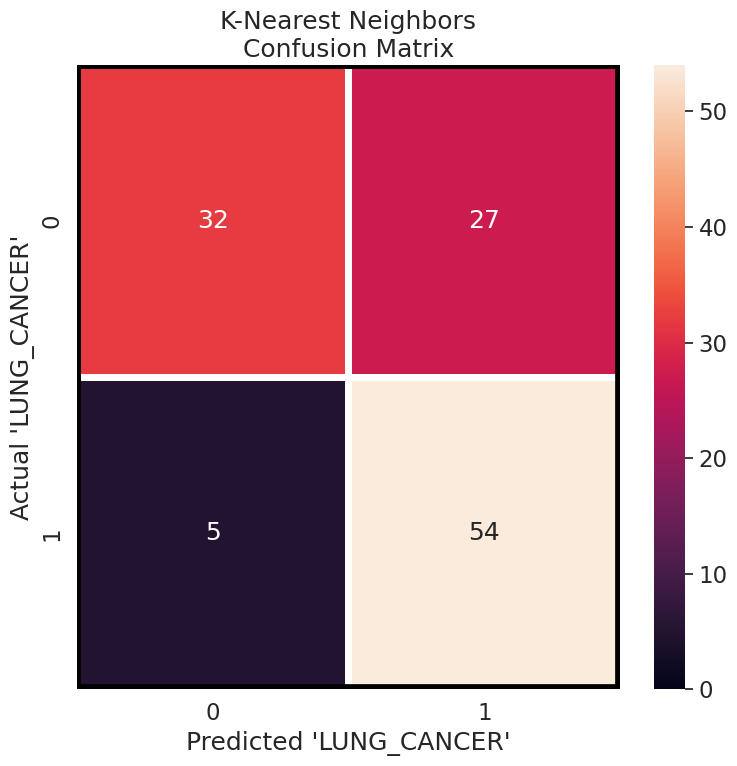

In [ ]:
# KNN Model Evaluation
y_pred_knn = knn.predict(X_test_resamp)

print(classification_report(y_test_resamp, y_pred_knn))

confusion_knn = confusion_matrix(y_test_resamp, y_pred_knn)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("white"):
    fig, axs = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_knn, annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
    axs.set_title('K-Nearest Neighbors\nConfusion Matrix')
    axs.set_xlabel("Predicted 'LUNG_CANCER'")
    axs.set_ylabel("Actual 'LUNG_CANCER'")
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=confusion_knn.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=confusion_knn.shape[0], color='k',linewidth=7)
    plt.tight_layout()
    plt.show()

In [ ]:
# We are only interested in how well we Recall the 'YES'(1) label for 'LUNG_CANCER'
knn_recall_score = recall_score(y_test_resamp, y_pred_knn, labels=1)
knn_avg_recall_score = recall_score(y_test_resamp, y_pred_knn, average="weighted")
print(f"K-Nearest Neighbors Classifier Recall ('YES'): {knn_recall_score}")
print(f"K-Nearest Neighbors Classifier Average Recall: {knn_avg_recall_score}")

K-Nearest Neighbors Classifier Recall ('YES'): 0.9152542372881356
K-Nearest Neighbors Classifier Average Recall: 0.7288135593220338


In [ ]:
# Random Forest
param_grid = {
    'n_estimators': [25, 30, 40, 50, 75, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8, 9, 10, 11, 12],
    'criterion' :['gini', 'entropy']
}
randfor = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
randfor.fit(X_train_resamp, y_train_resamp)

print(randfor.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.95      0.97        59

    accuracy                           0.97       118
   macro avg       0.98      0.97      0.97       118
weighted avg       0.98      0.97      0.97       118



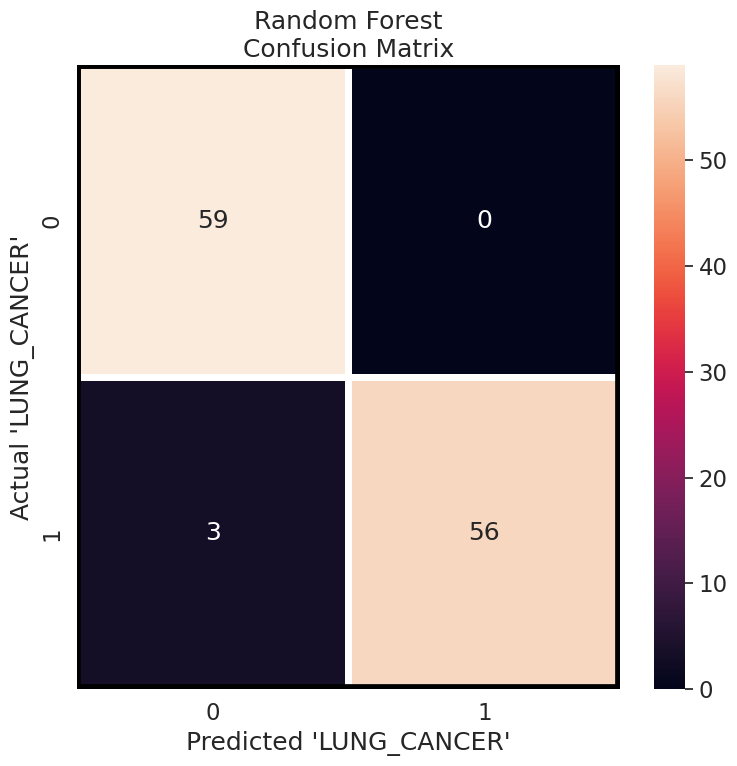

In [ ]:
# Random Forest Model Evaluation
y_pred_randfor = randfor.predict(X_test_resamp)

print(classification_report(y_test_resamp, y_pred_randfor))

confusion_randfor = confusion_matrix(y_test_resamp, y_pred_randfor)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("white"):
    fig, axs = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_randfor, annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
    axs.set_title('Random Forest\nConfusion Matrix')
    axs.set_xlabel("Predicted 'LUNG_CANCER'")
    axs.set_ylabel("Actual 'LUNG_CANCER'")
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=confusion_logreg.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=confusion_logreg.shape[0], color='k',linewidth=7)
    plt.tight_layout()
    plt.show()

In [ ]:
# We are only interested in how well we Recall the 'YES'(1) label for 'LUNG_CANCER'
randfor_recall_score = recall_score(y_test_resamp, y_pred_randfor, labels=1)
randfor_avg_recall_score = recall_score(y_test_resamp, y_pred_randfor, average="weighted")
print(f"Random Forest Classifier Recall ('YES'): {randfor_recall_score}")
print(f'Random Forest Classifier Average Recall: {randfor_avg_recall_score}')

Random Forest Classifier Recall ('YES'): 0.9491525423728814
Random Forest Classifier Average Recall: 0.9745762711864406


In [ ]:
# Gradient Boosting
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
gbc.fit(X_train_resamp, y_train_resamp)

print(gbc.best_params_)

{'n_estimators': 75, 'learning_rate': 0.5}


              precision    recall  f1-score   support

           0       0.90      0.47      0.62        59
           1       0.64      0.95      0.77        59

    accuracy                           0.71       118
   macro avg       0.77      0.71      0.69       118
weighted avg       0.77      0.71      0.69       118



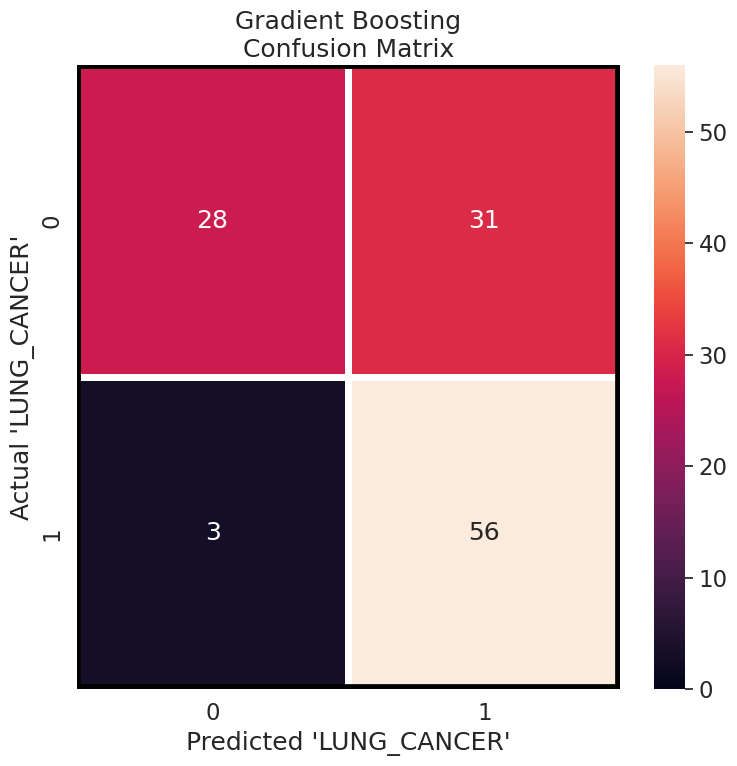

In [ ]:
# Gradient Boosting Model Evaluation
y_pred_gbc = gbc.predict(X_test_resamp)

print(classification_report(y_test_resamp, y_pred_gbc))

confusion_gbc = confusion_matrix(y_test_resamp, y_pred_gbc)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("white"):
    fig, axs = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_gbc, annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
    axs.set_title('Gradient Boosting\nConfusion Matrix')
    axs.set_xlabel("Predicted 'LUNG_CANCER'")
    axs.set_ylabel("Actual 'LUNG_CANCER'")
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=confusion_logreg.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=confusion_logreg.shape[0], color='k',linewidth=7)
    plt.tight_layout()
    plt.show()

In [ ]:
# We are only interested in how well we Recall the 'YES'(1) label for 'LUNG_CANCER'
gbc_recall_score = recall_score(y_test_resamp, y_pred_gbc, labels=1)
gbc_avg_recall_score = recall_score(y_test_resamp, y_pred_gbc, average="weighted")
print(f"Gradient Boosting Classifier Recall ('YES'): {gbc_recall_score}")
print(f'Gradient Boosting Classifier Average Recall: {gbc_avg_recall_score}')

Gradient Boosting Classifier Recall ('YES'): 0.9491525423728814
Gradient Boosting Classifier Average Recall: 0.711864406779661


In [ ]:
# LGBM
lgbm = lgbm.LGBMClassifier()
lgbm.fit(X_train_resamp, y_train_resamp)

LGBMClassifier()

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        59
           1       0.88      0.95      0.91        59

    accuracy                           0.91       118
   macro avg       0.91      0.91      0.91       118
weighted avg       0.91      0.91      0.91       118



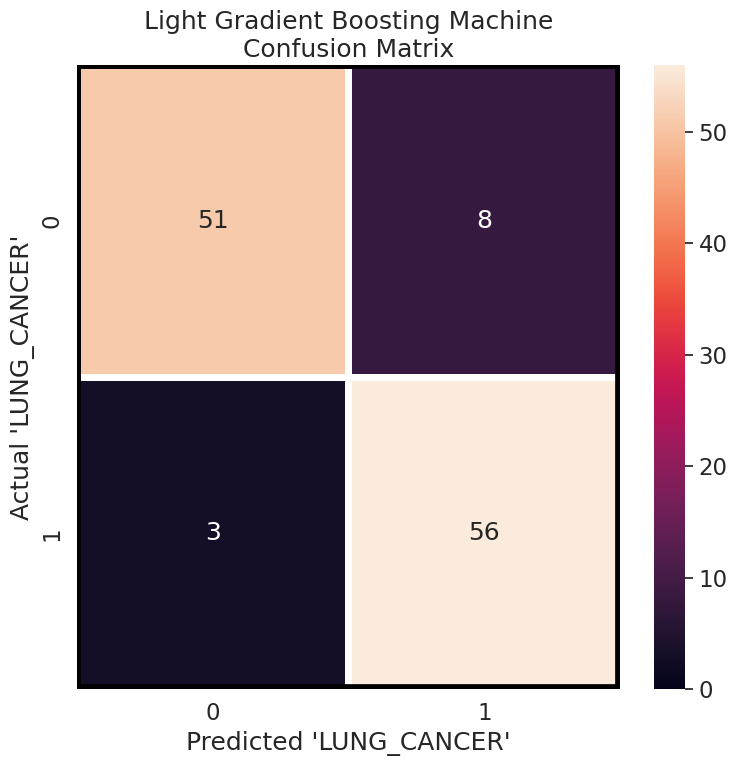

In [ ]:
# LGBM Model Evaluation
y_pred_lgbm = lgbm.predict(X_test_resamp)

print(classification_report(y_test_resamp, y_pred_lgbm))

confusion_lgbm = confusion_matrix(y_test_resamp, y_pred_lgbm)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("white"):
    fig, axs = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_lgbm, annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
    axs.set_title('Light Gradient Boosting Machine\nConfusion Matrix')
    axs.set_xlabel("Predicted 'LUNG_CANCER'")
    axs.set_ylabel("Actual 'LUNG_CANCER'")
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=confusion_logreg.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=confusion_logreg.shape[0], color='k',linewidth=7)
    plt.tight_layout()
    plt.show()

In [ ]:
# We are only interested in how well we Recall the 'YES'(1) label for 'LUNG_CANCER'
lgbm_recall_score = recall_score(y_test_resamp, y_pred_lgbm, labels=1)
lgbm_avg_recall_score = recall_score(y_test_resamp, y_pred_lgbm, average="weighted")
print(f"Light Gradient Boosting Machine Classifier Recall ('YES'): {lgbm_recall_score}")
print(f'Light Gradient Boosting Machine Classifier Average Recall: {lgbm_avg_recall_score}')

Light Gradient Boosting Machine Classifier Recall ('YES'): 0.9491525423728814
Light Gradient Boosting Machine Classifier Average Recall: 0.9067796610169492


In [ ]:
# SVC
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C':[0.001,0.01,0.1,1,10,100, 200, 300, 500],
    'gamma':[0.001,0.01,0.1,1,10,100, 200, 300, 500]
}
svc = GridSearchCV(SVC(), param_grid, cv=5)
svc.fit(X_train_resamp, y_train_resamp)

print(svc.best_params_)

{'C': 1, 'gamma': 100, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.50      1.00      0.67        59

    accuracy                           0.50       118
   macro avg       0.25      0.50      0.33       118
weighted avg       0.25      0.50      0.33       118



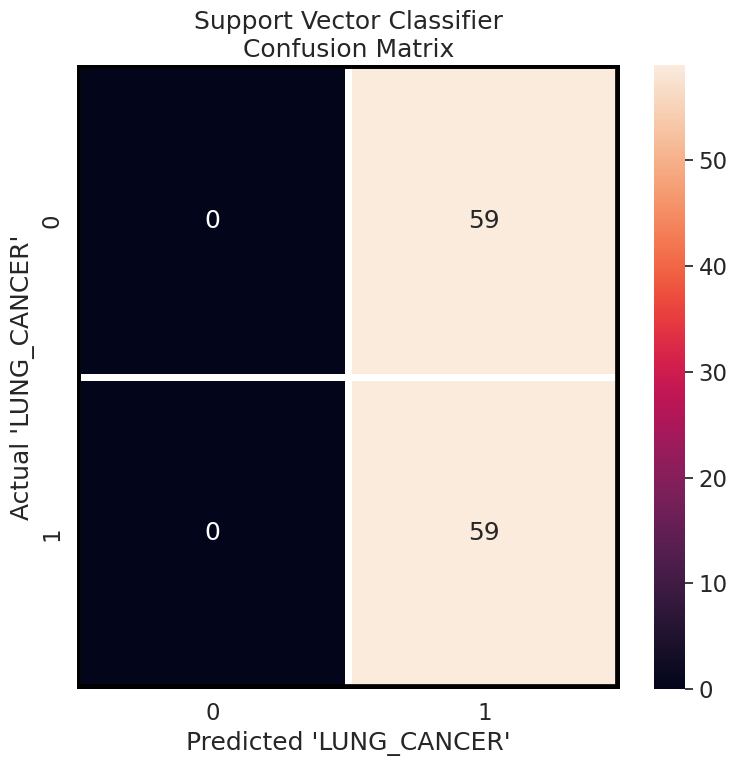

In [ ]:
# SVC Model Evaluation
y_pred_svc = svc.predict(X_test_resamp)

print(classification_report(y_test_resamp, y_pred_svc))

confusion_svc = confusion_matrix(y_test_resamp, y_pred_svc)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("white"):
    fig, axs = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_svc, annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
    axs.set_title('Support Vector Classifier\nConfusion Matrix')
    axs.set_xlabel("Predicted 'LUNG_CANCER'")
    axs.set_ylabel("Actual 'LUNG_CANCER'")
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=confusion_logreg.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=confusion_logreg.shape[0], color='k',linewidth=7)
    plt.tight_layout()
    plt.show()

In [ ]:
# We are only interested in how well we Recall the 'YES'(1) label for 'LUNG_CANCER'
svc_recall_score = recall_score(y_test_resamp, y_pred_svc, labels=1)
svc_avg_recall_score = recall_score(y_test_resamp, y_pred_svc, average="weighted")
print(f"Support Vector Classifier Recall ('YES'): {svc_recall_score}")
print(f'Support Vector Classifier Average Recall: {svc_avg_recall_score}')

Support Vector Classifier Recall ('YES'): 1.0
Support Vector Classifier Average Recall: 0.5


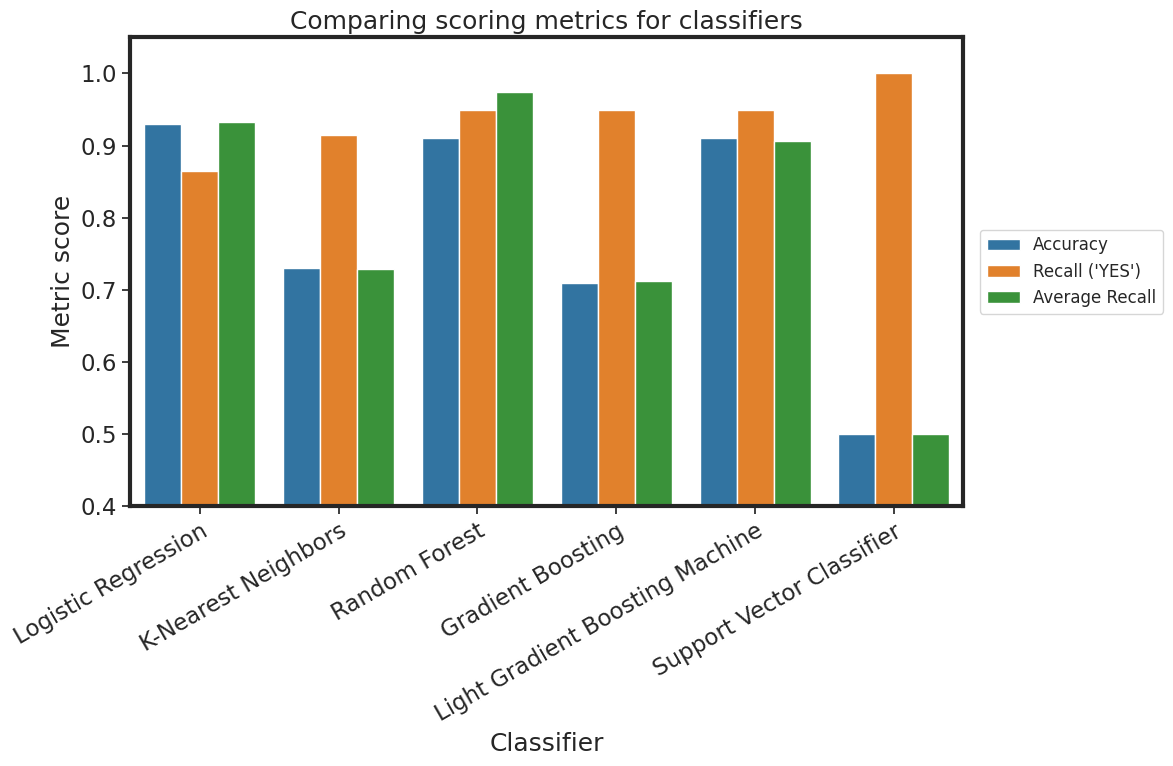

In [ ]:
all_recall_acc_scores = {
    'Classifier':['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosting', 'Light Gradient Boosting Machine', 'Support Vector Classifier'],
    'Accuracy':[0.93, 0.73, 0.91, 0.71, 0.91, 0.50],
    "Recall ('YES')":[logreg_recall_score, knn_recall_score, randfor_recall_score, gbc_recall_score, lgbm_recall_score, svc_recall_score],
    'Average Recall':[logreg_avg_recall_score, knn_avg_recall_score, randfor_avg_recall_score, gbc_avg_recall_score, lgbm_avg_recall_score, svc_avg_recall_score],
}

all_recall_acc_scores = pd.DataFrame(data=all_recall_acc_scores)
all_recall_acc_scores = pd.melt(all_recall_acc_scores, id_vars='Classifier')
all_recall_acc_scores.rename(columns={'variable':'Metric'}, inplace=True)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    fig, axs = plt.subplots(figsize=(12,8))
    sns.barplot(data=all_recall_acc_scores, x='Classifier', y='value', hue='Metric', ax=axs)
    axs.set_xticklabels(axs.get_xticklabels(), rotation=30, horizontalalignment='right', rotation_mode='anchor')
    axs.set_ylabel('Metric score')
    axs.set_title('Comparing scoring metrics for classifiers')
    axs.set_ylim(0.40, 1.05)
    for spine in ['left', 'top', 'right', 'bottom']:
        axs.spines[spine].set_linewidth(3),
    plt.legend(bbox_to_anchor=[1.01, 0.5], loc='center left')
    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.95      0.97        59

    accuracy                           0.97       118
   macro avg       0.98      0.97      0.97       118
weighted avg       0.98      0.97      0.97       118



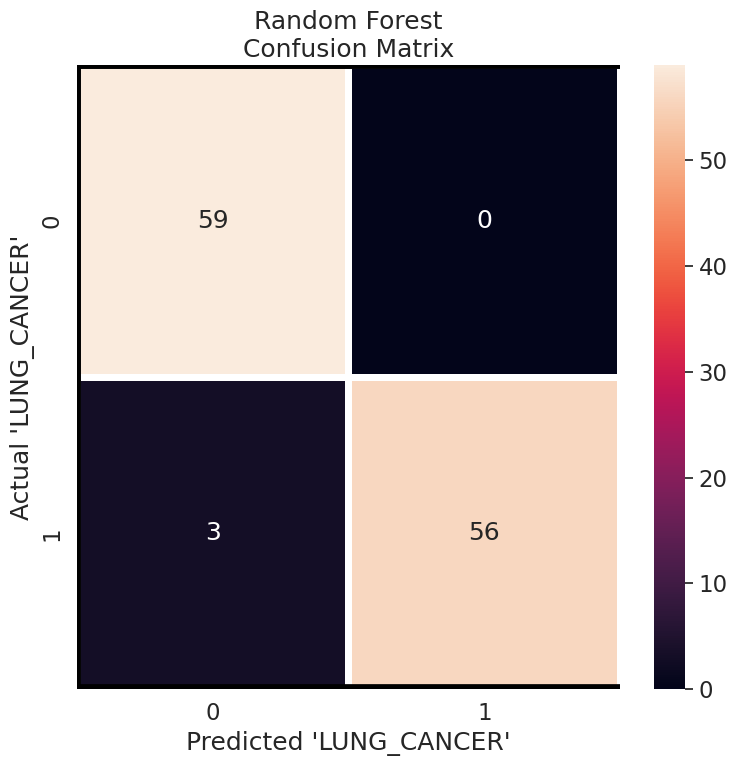

In [ ]:
# Final Model Choice - Random Forest with Recall ('YES') 0.95 and Average Recall 0.97

# Random Forest
randfor = RandomForestClassifier(n_estimators=50, max_features='auto', max_depth=9, criterion='gini', random_state=42)
randfor.fit(X_train_resamp, y_train_resamp)
y_pred_randfor = randfor.predict(X_test_resamp)

print(classification_report(y_test_resamp, y_pred_randfor))

confusion_randfor = confusion_matrix(y_test_resamp, y_pred_randfor)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("white"):
    fig, axs = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_randfor, annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
    axs.set_title('Random Forest\nConfusion Matrix')
    axs.set_xlabel("Predicted 'LUNG_CANCER'")
    axs.set_ylabel("Actual 'LUNG_CANCER'")
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=confusion_logreg.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    plt.tight_layout()
    plt.show()

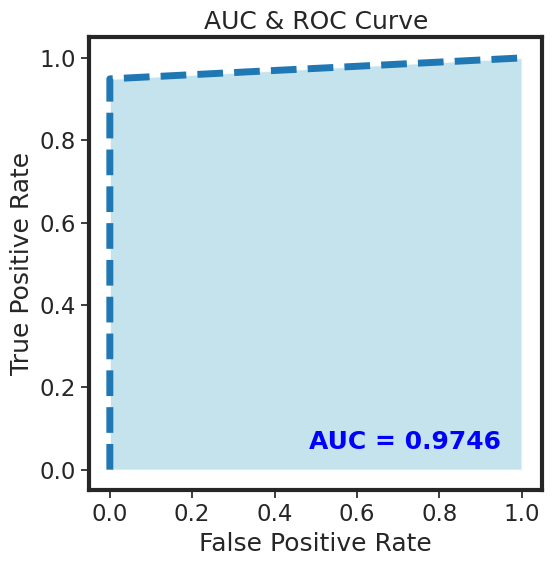

In [ ]:
auc = metrics.roc_auc_score(y_test_resamp, y_pred_randfor)

false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test_resamp, y_pred_randfor)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    fig, axs = plt.subplots(figsize=(6,6))
    sns.lineplot(x=false_positive_rate, y=true_positive_rate, linewidth=5, linestyle='--', estimator=None, ax=axs,)
    axs.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
    axs.text(0.95, 0.05, f'AUC = {auc:0.4f}', ha='right', weight='bold', color='blue')
    axs.set_title('AUC & ROC Curve')
    axs.set_xlabel('False Positive Rate')
    axs.set_ylabel('True Positive Rate')
    axs.set_xlim([-1, 2])
    axs.set_ylim([-1, 2])
    for spine in ['left', 'top', 'right', 'bottom']:
        axs.spines[spine].set_linewidth(3),
    plt.axis('scaled')
    plt.tight_layout()
    plt.show()